/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


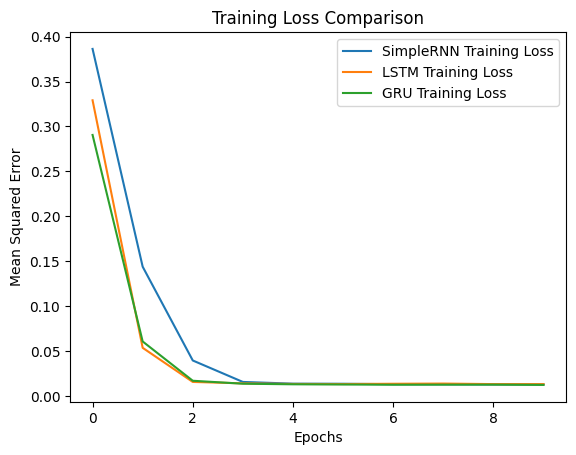

Mean Squared Error on Test Set:
SimpleRNN: 0.012122499082853554
LSTM: 0.011033889809598922
GRU: 0.012707781944467911


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error


np.random.seed(42)
n_samples = 1000
time_steps = 20


t = np.linspace(0, 10, n_samples, endpoint=False)
data = np.sin(t) + 0.1 * np.random.randn(n_samples)

sequences = []
targets = []
for i in range(n_samples - time_steps):
    seq = data[i : i + time_steps]
    target = data[i + time_steps]
    sequences.append(seq)
    targets.append(target)

sequences = np.array(sequences)
targets = np.array(targets)

sequences = sequences.reshape(-1, time_steps, 1)

split = int(0.8 * n_samples)
X_train, X_test = sequences[:split], sequences[split:]
y_train, y_test = targets[:split], targets[split:]

def build_and_train_model(model_type):
    model = Sequential()
    if model_type == "SimpleRNN":
        model.add(SimpleRNN(50, activation="relu", input_shape=(time_steps, 1)))
    elif model_type == "LSTM":
        model.add(LSTM(50, activation="relu", input_shape=(time_steps, 1)))
    elif model_type == "GRU":
        model.add(GRU(50, activation="relu", input_shape=(time_steps, 1)))
    else:
        raise ValueError("Invalid model type")

    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    return model, history

rnn_model, rnn_history = build_and_train_model("SimpleRNN")
lstm_model, lstm_history = build_and_train_model("LSTM")
gru_model, gru_history = build_and_train_model("GRU")

rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)
gru_pred = gru_model.predict(X_test)

rnn_mse = mean_squared_error(y_test, rnn_pred)
lstm_mse = mean_squared_error(y_test, lstm_pred)
gru_mse = mean_squared_error(y_test, gru_pred)

plt.plot(rnn_history.history["loss"], label="SimpleRNN Training Loss")
plt.plot(lstm_history.history["loss"], label="LSTM Training Loss")
plt.plot(gru_history.history["loss"], label="GRU Training Loss")
plt.legend()
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

print(f"Mean Squared Error on Test Set:")
print(f"SimpleRNN: {rnn_mse}")
print(f"LSTM: {lstm_mse}")
print(f"GRU: {gru_mse}")
